# Iterative Methods for Optimization

Recall that a general optimization problem has the form

\begin{align}
\min_x & \quad f_0(x) \\
\text{subject to} & \quad f_i(x) \leq b_i, \quad i = 1, \dots, m,
\end{align}

with components
* $x \in \mathbf{R}^n$ - optimization variable,
* $f_0: \mathbf{R}^n \to \mathbf{R}$ - objective function,
* $f_i: \mathbf{R}^n \to \mathbf{R}$ - constraint functions, and
* $b_i \in \mathbf{R}$: constraint bounds.

Very few optimization problems have a closed-form solution (e.g., least-squares), so most problems are solved using iterative methods.
This notebook introduces two fundamental iterative methods for solving unconstrained optimization problems of the form

$$\min_x f(x)$$

with $x \in \mathbf{R}^n$ and $f: \mathbf{R}^n \to \mathbf{R}$, where $f$ is differentiable.

Iterative methods start with an initial guess $x^0$.
Each iteration, a new value $x^{k+1}$ is generated based on the previous value $x^k$, often using local information such as the gradient $\nabla f(x^k)$ or Hessian $\nabla^2 f(x^k)$.
The algorithm terminates when a stopping condition is satisfied, which can be specified in terms of the size of the gradient, $\| \nabla f(x^{k+1}) \| \leq \epsilon$, the difference between successive iterates, $\| x^{k+1} - x^k \| \leq \epsilon$ or $\| f(x^{k+1}) - f(x^k) \| \leq \epsilon$, or a maximum number of iterations, $k \geq k_{\max}$.

# Gradient Descent

Gradient descent is built upon the fact that the gradient of a function always points in the direction of maximum ascent.
Therefore, starting at the point $x^k$ and taking a step in the direction of the negative gradient, we should arrive at a point $x^{k+1}$ that has a smaller function value, i.e., $f(x^{k+1}) < f(x^k)$.
After multiple iterations, we hope to approximate the optimal solution $x^* = \text{argmin}_x f(x)$.

Here's the algorithm for gradient descent with initial guess $x^0$, step size $\alpha$, and stopping condition based on the size of the gradient:

> **input** $x^0$, $\alpha$, $\epsilon$  
> **set** $k = 0$  
> **while** $\| \nabla f(x^k) \| < \epsilon$ **do**  
> &nbsp;&nbsp;&nbsp;&nbsp;$x^{k+1} \leftarrow x^k - \alpha \nabla f(x^k)$  
> &nbsp;&nbsp;&nbsp;&nbsp;$k \leftarrow k + 1$  
> **end while**

##### How do we choose the initial guess?

Depending upon the problem, the initial guess can infuence the value of the solution, the number of iterations needed to converge to a solution, or whether or not the algorithm converges at all.
Determining a "good" initial guess is often a difficult problem itself, especially when $x$ is high-dimensional, so heuristics are often useful:
* $x^0$ = a vector of ones or zeros
* $x^0$ = a random vector
* $x^0$ = the solution to a similar, but easier, problem

##### How do we choose the step size?

* Talk about problems of too small or too large, cycles
* Talk about Lipschitz constant
* Talk about line-search or trust-region methods
* Talk about Newton's method (with reference to next section)

##### How do we choose the stopping condition?

* Talk about KKT conditions
* Talk about choosing $\epsilon$ (we don't need to go too low if the precision of the data is low or the noise level is high)

Notebook outline:
1 Gradient descent

Goals of this notebook:
* Introduce gradient descent intuition
    * Play with learning rate
    * Play with  initial condition
* Introduce Newton's method intuition
    * Play with initial guess
    
# Questions:
* Do we need the 1D example? We can probably communicate the same ideas with the 2D example


Include references, maybe mention other themes in optmization
methods with links (stochastic GD, quasi-newton, CG, constrained, ???)

What are some of the popular options for learning models in sklearn?
Maybe give some brief info?
Explain why first-order methods more popular in ML
* Expensive to compute Hessian
* Even GD expensive for large models -> SGD

Choosing learning rate:
* trust-region vs. line-search
* learning rate schedule for SGD

Variance reduction for SGD  
Accelerated gradient descent

## Gradient Descent

Recall that if we consider a $\beta$-smooth objective $f$, and want to solve the optimizatoin problem,
$$
\min_{x}~~f(x)
$$
the gradient descend algorithm can be specify as,

* input: $x_0$
* set $k = 0$
* while $\|\nabla f(x_k)\| \ge $ tolerance
\begin{align*}
x_{k+1} &\leftarrow x_k - \frac{1}{\beta} \nabla f(x_k)\\
k &\leftarrow k + 1
\end{align*}
end
* output: $x_k$ 

Now let us consider the algorithm in the context of logistic regression, where,
$$
f(x) = \sum_{i=1}^m [\ln(1 + \exp(\langle a_i, x \rangle)) - y_i\langle a_i, x \rangle] + \frac{\lambda}{2} \|x\|^2.
$$

Moreover,
$$
\nabla f(x) = \sum_{i=1}^m \frac{\exp(\langle a_i, x \rangle)}{1 + \exp(\langle a_i, x \rangle)} a_i - y_i a_i + \lambda x, \quad
\nabla^2 f(x) = \sum_{i=1}^m \frac{\exp(\langle a_i, x \rangle)}{(1+\exp(\langle a_i, x \rangle))^2} a_i a_i^\top + \lambda I.
$$

And since
$$
\frac{z}{(1+z)^2} \le \frac{1}{4}, \quad \forall z \ge 0,
$$
we have,
$$
\|\nabla^2 f(x)\| \le \frac{1}{4}\|A\|^2 + \lambda
$$
where $A = [a_1, a_2, \ldots, a_m]$. Therefore we could set our $\beta = \frac{1}{4}\|A\|^2 + \lambda$.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

import utils

Include description of gradient descent

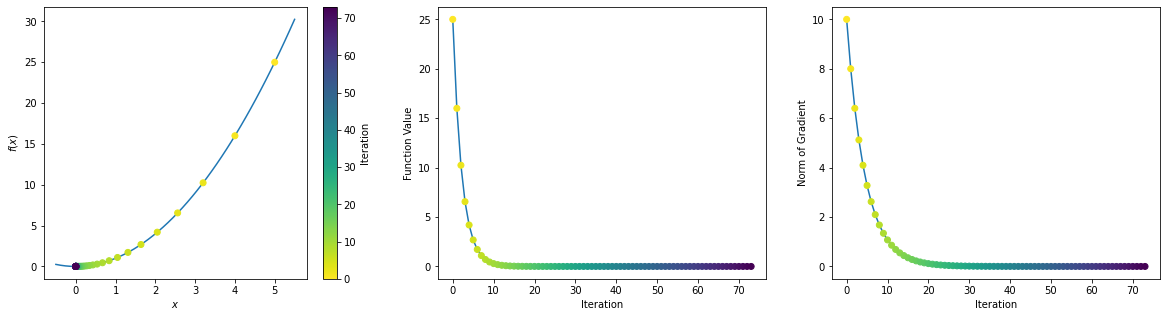

In [93]:
# Minimize function
x0 = 5
func = lambda x: x**2
grad = lambda x: 2*x
step = 0.1
results = utils.gradient_descent(x0, func, grad, step)
utils.plot_1d(func, results)

# Possible questions for them to investigate:
# * Try changing the step size in the range (0, 1] to see what happens.
# * Are there any step sizes that can find the minimum in one step? (0.5)
# * Are there any step sizes that result in a cycle? (1)
# * What happens if the step size is too small?
# * What happens if the step size is too big?

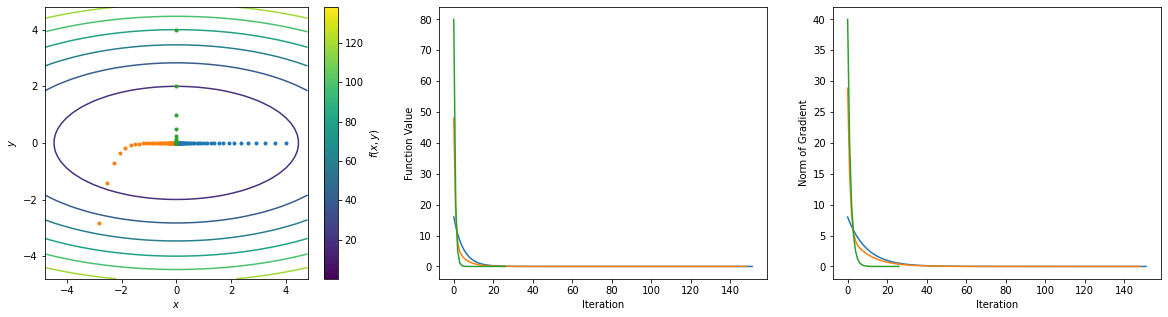

In [101]:
# Set up problem
step = 0.05
func = lambda x: x[0]**2 + 5*x[1]**2
grad = lambda x: np.array([2*x[0], 10*x[1]])

# one step: 0.1
# cycle: 0.2

x0 = [[4, 0], [-2*np.sqrt(2), -2*np.sqrt(2)], [0, 4]]
results = [utils.gradient_descent(x0[ii], func, grad, step) for ii in range(len(x0))]
utils.plot_2d(lambda x, y: x**2 + 5*y**2, results)
# What's the difference between the initial conditions?
# Why does one converge in less iterations than the other?

# Try other initial conditions to see what happens...

Introduce Newton's method

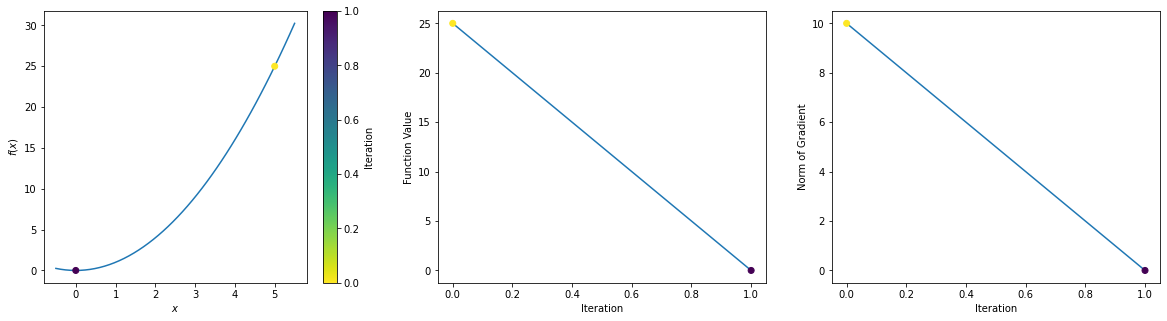

In [19]:
# Minimize function
x0 = 5
func = lambda x: x**2
grad = lambda x: 2*x
hess = lambda x: 2
results = utils.newtons_method(x0, func, grad, hess)
utils.plot_1d(func, results)

# Step size 1/f'' gives us solution in one step, like we found with step size = 1/2 previously

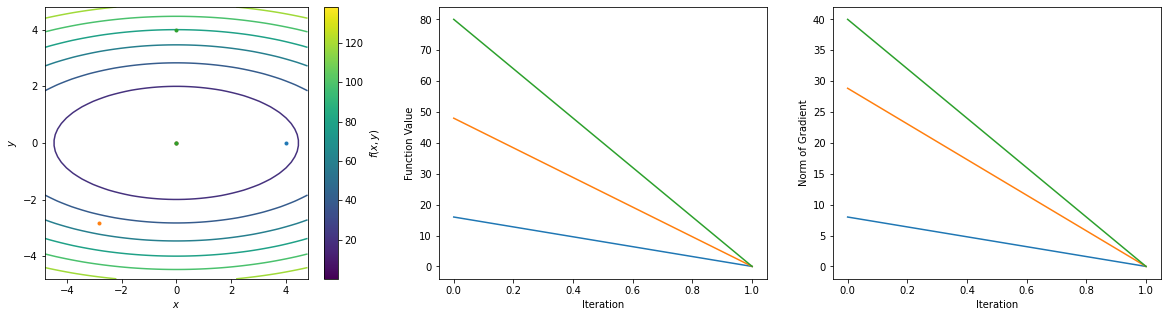

In [92]:
# Set up problem
step = 0.05
func = lambda x: x[0]**2 + 5*x[1]**2
grad = lambda x: np.array([2*x[0], 10*x[1]])
hess = lambda x: np.array([[2, 0], [0, 10]])

x0 = [[4, 0], [-2*np.sqrt(2), -2*np.sqrt(2)], [0, 4]]
results = [utils.newtons_method(x0[ii], func, grad, hess) for ii in range(len(x0))]
utils.plot_2d(lambda x, y: x**2 + 5*y**2, results)

# wohoo, found one step for all!
